#### Part 1: Building N-Gram Language Models

##### Preprocessing and Tokenizing Reuters Corpus:

In [1]:
import nltk, re
from nltk import word_tokenize, sent_tokenize
from nltk import bigrams, trigrams
from nltk.corpus import reuters

In [2]:
file_ids = reuters.fileids()
print(file_ids[0:10])
print(len(file_ids))

['test/14826', 'test/14828', 'test/14829', 'test/14832', 'test/14833', 'test/14839', 'test/14840', 'test/14841', 'test/14842', 'test/14843']
10788


In [3]:
sentences = []
words = []

for file_id in file_ids:
    text = reuters.raw(file_id)
    
    # Tokenizing the document into sentences and removing special characters and new lines
    text_sentences = nltk.sent_tokenize(text)
    text_sentences = [re.sub(r'\n', ' ', sent) for sent in text_sentences]
    text_sentences = [re.sub(r'\s+', ' ', sent).strip() for sent in text_sentences]
    sentences.extend(text_sentences)
    
    # Tokenize the document into words
    text_words = nltk.word_tokenize(text)
    text_words = [word for word in text_words if word.isalpha()]  # Exclude non-alphabetic characters
    words.extend(text_words)

In [4]:
# Total number of sentences and words in the corpus
print("Total number of sentences:", len(sentences))
print("Total number of words:", len(words))

# Example of sentences and words in the corpus
print("\nExample Sentences:")
print(sentences[0:3])

print("\nExample Words:")
print(words[:20])

Total number of sentences: 53792
Total number of words: 1275048

Example Sentences:
["ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT Mounting trade friction between the U.S. And Japan has raised fears among many of Asia's exporting nations that the row could inflict far-reaching economic damage, businessmen and officials said.", 'They told Reuter correspondents in Asian capitals a U.S. Move against Japan might boost protectionist sentiment in the U.S. And lead to curbs on American imports of their products.', "But some exporters said that while the conflict would hurt them in the long-run, in the short-term Tokyo's loss might be their gain."]

Example Words:
['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'RIFT', 'Mounting', 'trade', 'friction', 'between', 'the', 'And', 'Japan', 'has', 'raised', 'fears', 'among', 'many', 'of', 'Asia']


In [5]:
# Calculating frequency distribution to understand the corpus

from nltk import FreqDist
fd = FreqDist(words)
fd

FreqDist({'the': 58220, 'of': 35949, 'to': 33981, 'in': 26447, 'said': 25222, 'and': 25015, 'a': 23448, 'mln': 18012, 'vs': 14111, 'for': 12475, ...})

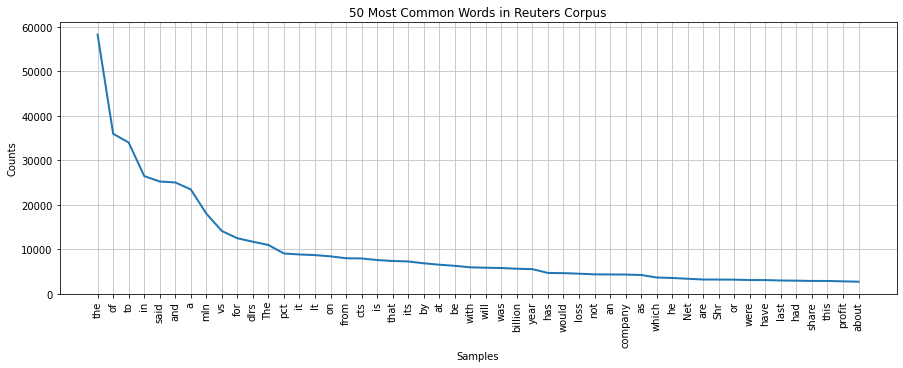

In [6]:
# Plotting the frequency distribution of 50 most common words in the corpus

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
fd.plot(50, title='50 Most Common Words in Reuters Corpus')
plt.show()

In [7]:
# Performing some statistical analysis

# Average number of words per sentence
average_words = round(len(words)/len(sentences))
print("The average number of words per sentence is", average_words) 

# Unique words in the corpus
unique_words = set(words)
print("The number of unique words are", len(unique_words))

The average number of words per sentence is 24
The number of unique words are 38131


##### Removing Stopwords:

In [8]:
from nltk.util import ngrams
from nltk.corpus import stopwords

In [9]:
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.lower() not in stop_words]
print("Total number of filtered words are:", len(filtered_words))

Total number of filtered words are: 839056


In [10]:
# Creating frequency distribution without stopwords

fd2 = FreqDist(filtered_words)
fd2

FreqDist({'said': 25222, 'mln': 18012, 'vs': 14111, 'dlrs': 11698, 'pct': 9054, 'lt': 8694, 'cts': 7942, 'billion': 5632, 'year': 5542, 'would': 4646, ...})

##### Creating N-Grams:

In [11]:
# Creating unigrams, bigrams, trigrams, and fourgrams without stopwords removal for richer context

unigram = words
bigram = list(ngrams(words, 2))
trigram = list(ngrams(words, 3))
fourgram = list(ngrams(words, 4))

In [12]:
print("Unigram Looks Like:")
print(unigram[:20])

print("\nBigram Looks Like:")
print(bigram[:10])

print("\nTrigram Looks Like:")
print(trigram[:10])

print("\nFourgram Looks Like:")
print(fourgram[:10])

Unigram Looks Like:
['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'RIFT', 'Mounting', 'trade', 'friction', 'between', 'the', 'And', 'Japan', 'has', 'raised', 'fears', 'among', 'many', 'of', 'Asia']

Bigram Looks Like:
[('ASIAN', 'EXPORTERS'), ('EXPORTERS', 'FEAR'), ('FEAR', 'DAMAGE'), ('DAMAGE', 'FROM'), ('FROM', 'RIFT'), ('RIFT', 'Mounting'), ('Mounting', 'trade'), ('trade', 'friction'), ('friction', 'between'), ('between', 'the')]

Trigram Looks Like:
[('ASIAN', 'EXPORTERS', 'FEAR'), ('EXPORTERS', 'FEAR', 'DAMAGE'), ('FEAR', 'DAMAGE', 'FROM'), ('DAMAGE', 'FROM', 'RIFT'), ('FROM', 'RIFT', 'Mounting'), ('RIFT', 'Mounting', 'trade'), ('Mounting', 'trade', 'friction'), ('trade', 'friction', 'between'), ('friction', 'between', 'the'), ('between', 'the', 'And')]

Fourgram Looks Like:
[('ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE'), ('EXPORTERS', 'FEAR', 'DAMAGE', 'FROM'), ('FEAR', 'DAMAGE', 'FROM', 'RIFT'), ('DAMAGE', 'FROM', 'RIFT', 'Mounting'), ('FROM', 'RIFT', 'Mounting', 'trade'), ('RIFT'

In [13]:
# Creating frequency distributions of each n-gram and checking the most common ngrams

freq_bi = nltk.FreqDist(bigram)
freq_tri = nltk.FreqDist(trigram)
freq_four = nltk.FreqDist(fourgram)

print("Most common n-grams without stopword removal: \n")

print ("Most common bigrams: ", freq_bi.most_common(5))
print ("Most common trigrams: ", freq_tri.most_common(5))
print ("Most common fourgrams: ", freq_four.most_common(5))

Most common n-grams without stopword removal: 

Most common bigrams:  [(('of', 'the'), 6843), (('in', 'the'), 6578), (('mln', 'dlrs'), 4222), (('said', 'it'), 4037), (('vs', 'mln'), 3928)]
Most common trigrams:  [(('mln', 'vs', 'mln'), 3397), (('cts', 'vs', 'cts'), 1707), (('Revs', 'mln', 'vs'), 1498), (('Shr', 'cts', 'vs'), 1210), (('vs', 'cts', 'Net'), 1163)]
Most common fourgrams:  [(('Revs', 'mln', 'vs', 'mln'), 1394), (('cts', 'vs', 'cts', 'Net'), 1072), (('Shr', 'cts', 'vs', 'cts'), 1025), (('vs', 'cts', 'Net', 'vs'), 902), (('vs', 'Revs', 'mln', 'vs'), 699)]


##### Performing Add-One Smoothing:

In [14]:
from collections import Counter
from collections import defaultdict

def calculate_ngram_prob(corpus, n):
    
    # Creates a list of all possible ngrams from different ngrams model and stores unique ngrams seperately
    all_ngrams = list(ngrams(corpus, n))
    voc_ngrams = set(all_ngrams)
    
    total_ngrams = len(all_ngrams)
    total_voc = len(voc_ngrams)

    counts = Counter(all_ngrams)
    i=0
    ngrams_prob = defaultdict(float)
    for ngram in voc_ngrams:
        count = counts[ngram]
        ngrams_prob[ngram] = (count + 1) / (total_ngrams + total_voc)  # Add-1 smoothing is performed here
        i=i+1
#         print(i,total_voc)
#         print(ngrams_prob[ngram])

    return ngrams_prob

In [15]:
# Example:

n = 10 # n here stands for the complexity of the n-gram ; n = 2 means bigram , n = 3 means trigram and so on
ngrams_probabilities = calculate_ngram_prob(words, n)

n = 2
bigram_probabilities = calculate_ngram_prob(words, n)

n = 3
trigram_probabilities = calculate_ngram_prob(words, n)

#### Part 2: Prediction of Words

In [16]:
# Function to predict next words for higher order ngrams (n = 5)
def predict_next_word_ngram(sequence, ngrams_probabilities, top_k = 15): #top_k refers to sentence length in the output
    
    n = len(sequence)
    
    if n > 0:
        possible_ngrams = [ngram for ngram in ngrams_probabilities.keys() if ngram[:n] == tuple(sequence)]
        if possible_ngrams:
            # Getting words and corresponding probabilities
            probabilities = [ngrams_probabilities[ngram] for ngram in possible_ngrams]

            # Sorting n-grams based on probabilities
            sorted_ngrams_probs = sorted(zip(possible_ngrams, probabilities), key = lambda x: x[1], reverse = True)

            # Returning the top predicted words along with their probabilities
            return sorted_ngrams_probs[:top_k]
        

# Repeating the same function for bigram
def predict_next_word_bigram(sequence, bigram_probabilities, top_k = 15):
    
    n = len(sequence)
    
    if n > 0:
        possible_ngrams = [ngram for ngram in bigram_probabilities.keys() if ngram[:n] == tuple(sequence)]
        if possible_ngrams:
            # Getting words and corresponding probabilities
            probabilities = [bigram_probabilities[ngram] for ngram in possible_ngrams]

            # Sorting n-grams based on probabilities
            sorted_ngrams_probs = sorted(zip(possible_ngrams, probabilities), key = lambda x: x[1], reverse = True)

            # Returning the top predicted words along with their probabilities
            return sorted_ngrams_probs[:top_k]

        
# Repeating the same function for trigram
def predict_next_word_trigram(sequence, tri_probabilities, top_k = 15):
    
    n = len(sequence)
    
    if n > 0:
        possible_ngrams = [ngram for ngram in tri_probabilities.keys() if ngram[:n] == tuple(sequence)]
        if possible_ngrams:
            # Getting words and corresponding probabilities
            probabilities = [tri_probabilities[ngram] for ngram in possible_ngrams]

            # Sorting n-grams based on probabilities
            sorted_ngrams_probs = sorted(zip(possible_ngrams, probabilities), key = lambda x: x[1], reverse = True)

            # Returning the top predicted words along with their probabilities
            return sorted_ngrams_probs[:top_k]

In [17]:
# Example:

sequence = ['he', 'is']

top_predictions_bigram = predict_next_word_bigram(sequence, bigram_probabilities)
top_predictions_trigram = predict_next_word_trigram(sequence, trigram_probabilities)
top_predictions_ngrams = predict_next_word_ngram(sequence, ngrams_probabilities)

In [18]:
# Printing the top 5 predicted words with the probabilities in a tuple format for each n-gram model

print("The Top Predictions For BiGrams Are: \n")
for ngram, prob in top_predictions_bigram:
    print(f"('{ngram[0]}', '{ngram[1]}'): {prob}")
    
print("\n ***************************************** \n")

print("The Top Predictions For Trigrams Are: \n")
for ngram, prob in top_predictions_trigram:
    print(f"('{ngram[0]}', '{ngram[1]}', '{ngram[2]}'): {prob}")

print("\n ***************************************** \n")
    
print("The Top Predictions N-Grams (n=5) Are: \n")
for ngram, prob in top_predictions_ngrams:
    print(f"('{ngram[0]}', '{ngram[1]}', '{ngram[2]}'): {prob}")
    
print("\n ***************************************** \n")

The Top Predictions For BiGrams Are: 

('he', 'is'): 3.7436245168761986e-05

 ***************************************** 

The Top Predictions For Trigrams Are: 

('he', 'is', 'not'): 3.888495448759108e-06
('he', 'is', 'also'): 2.4303096554744425e-06
('he', 'is', 'ready'): 1.944247724379554e-06
('he', 'is', 'optimistic'): 1.944247724379554e-06
('he', 'is', 'offering'): 1.944247724379554e-06
('he', 'is', 'seeking'): 1.944247724379554e-06
('he', 'is', 'the'): 1.4581857932846656e-06
('he', 'is', 'considering'): 1.4581857932846656e-06
('he', 'is', 'sceptical'): 1.4581857932846656e-06
('he', 'is', 'politically'): 1.4581857932846656e-06
('he', 'is', 'now'): 1.4581857932846656e-06
('he', 'is', 'very'): 1.4581857932846656e-06
('he', 'is', 'trying'): 9.72123862189777e-07
('he', 'is', 'cautiously'): 9.72123862189777e-07
('he', 'is', 'barred'): 9.72123862189777e-07

 ***************************************** 

The Top Predictions N-Grams (n=5) Are: 

('he', 'is', 'optimistic'): 1.215909445549346e-

We can see how different n-grams assign different probabilities to the subsequent word. We generally prefer higher order ngrams as the have a richer context while calculating probabilities. Therefore, in the next step i.e. sentence generation we will use, higher order ngrams to generate sentences.

#### Part 3: Creating Random Sentences

In [21]:
# Creating a function to generate sentences

def generate_sentence(initial_sequence, ngrams_probabilities, sentence_length = 15):
    current_sequence = initial_sequence.copy()
    
    for _ in range(sentence_length - len(initial_sequence)):
        next_word = predict_next_word_ngram(current_sequence, ngrams_probabilities)
        
        if next_word:
            current_sequence.append(next_word)
        else:
            break
            
    return current_sequence

In [22]:
# Example:

initial_sequence = ['he', 'is']
generated_sentence = generate_sentence(initial_sequence, ngrams_probabilities, sentence_length = 15)

In [23]:
# Printing the generated sentences in a read-able format along with probability

print("Generated Sentences: \n")

for ngram, prob in generated_sentence[-1]:
    print(f"{' '.join(ngram)} ... ({prob})")

Generated Sentences: 

he is optimistic about investment prospects in China and that ... (1.215909445549346e-06)
he is sceptical about the effectiveness of currency reference ranges ... (1.215909445549346e-06)
he is ready to state that the best way to ... (1.215909445549346e-06)
he is politically the better off we are with the ... (1.215909445549346e-06)
he is still suspect about its debt situation Atlantic Richfield ... (8.106062970328973e-07)
he is worried that consumer spending may slow because inflation ... (8.106062970328973e-07)
he is comfortable with analysts predictions of dlrs to dlrs ... (8.106062970328973e-07)
he is the guardian of the mark President of the ... (8.106062970328973e-07)
he is not dissatisfied with management Bill Fulwider told Reuters ... (8.106062970328973e-07)
he is considering seeking representation on the board and starting ... (8.106062970328973e-07)
he is not very optimistic about the ongoing negotiations to ... (8.106062970328973e-07)
he is ready to see

In [24]:
# Example:

initial_sequence = ['the', 'country']
generated_sentence = generate_sentence(initial_sequence, ngrams_probabilities, sentence_length = 15)

In [25]:
# Printing the generated sentences in a read-able format along with probability

print("Generated Sentences: \n")

for ngram, prob in generated_sentence[-1]:
    print(f"{' '.join(ngram)} ... ({prob})")

Generated Sentences: 

the country trade balance and alleviate the risk of a ... (1.215909445549346e-06)
the country capital Yamoussoukro between March senior Ivorian delegates will ... (1.215909445549346e-06)
the country asking about this issue He said People mentioned ... (1.215909445549346e-06)
the country international reserves a government decree in the Official ... (1.215909445549346e-06)
the country to make a greater effort to open up ... (1.215909445549346e-06)
the country of registration to escort ships in the Gulf ... (1.215909445549346e-06)
the country foreign aid donors met to consider giving it ... (1.215909445549346e-06)
the country enjoyed low inflation and because external factors including ... (1.215909445549346e-06)
the country would save money by importing the commodity However ... (1.215909445549346e-06)
the country has failed to fulfill its promise to expand ... (1.215909445549346e-06)
the country coffee exports low oil prices low inflation and ... (1.2159094455493